In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import torch

In [2]:
exp_name = 'Figures'
if os.path.isdir(exp_name) is False:
    os.makedirs(exp_name)

In [4]:
pwd

'/home/alfarhmy/Desktop/DeepFWIInvHessian/notebooks'

In [8]:
expG = np.load('Exp-FWI/results.npz')
print(expG.files)
expB = np.load('Exp-FWI-Born/results.npz')
print(expB.files)
# expB2 = np.load('Exp-FWI-Born/results2.npz')
# print(expB2.files)
expP = np.load('Exp-FWI-PSF/results.npz')
print(expP.files)
# expP2 = np.load('Exp-FWI-PSF/results2.npz')
# print(expP2.files)
expL = np.load('Exp-LBFGS/results.npz')
print(expL.files)

['data_loss', 'vel_loss']
['data_loss', 'vel_loss', 'network_loss']
['data_loss', 'vel_loss', 'network_loss']
['data_loss_lbfgs', 'vel_loss_lbfgs', 'nWE']


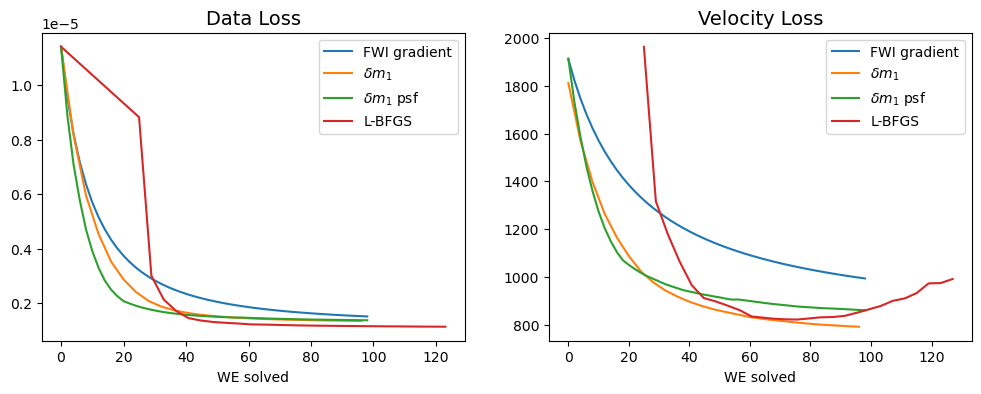

In [9]:
x1 = np.arange(0, 200, 2)
x2 = np.arange(0, 200, 4)
nWE = np.concatenate([[0], expL['nWE']]) # expL['nWE'][:26]
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(x1[:50], expG['data_loss'][:50], label='FWI gradient')
axs[0].plot(x2[:25], expB['data_loss'][:25], label=r'$\delta m_1$')
axs[0].plot(x1[:50], expP['data_loss'][:50], label=r'$\delta m_1$ psf')
axs[0].plot(nWE[:26], expL['data_loss_lbfgs'][:26], label='L-BFGS')
axs[0].set_xlabel('WE solved')
axs[0].legend()
axs[0].set_title('Data Loss', fontsize=14)

axs[1].plot(x1[:50], expG['vel_loss'][1:51], label='FWI gradient')
axs[1].plot(x2[:25], expB['vel_loss'][1:51][:25], label=r'$\delta m_1$')
axs[1].plot(x1[:50], expP['vel_loss'][1:51], label=r'$\delta m_1$ psf')
axs[1].plot(expL['nWE'][:26], expL['vel_loss_lbfgs'][:26], label='L-BFGS')
axs[1].set_xlabel('WE solved')
axs[1].legend()
axs[1].set_title('Velocity Loss', fontsize=14)
plt.savefig(f'{exp_name}/losses_fig.png',  bbox_inches='tight', dpi=300)

In [20]:
def plot_results(gradients, dm1s, gradients_network, dms, iteration=0, save_path=None):
    r = 0.84
    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    m_min, m_max = np.percentile(dms[iteration], [2,98])
    img1 = axs[0,0].imshow(gradients[iteration], vmin=-m_max, vmax=m_max, cmap='terrain', 
                           interpolation='bilinear', extent=(0, 2500, 1255, 0))
    plt.colorbar(img1, ax=axs[0,0], pad=0.02, shrink=r)
    axs[0,0].set_title(f'FWI Gradient', fontsize=14)
    axs[0,0].set_xlabel('(a)')

    img2 = axs[0,1].imshow(dm1s[iteration], vmin=-m_max, vmax=m_max, cmap='terrain', 
                           interpolation='bilinear', extent=(0, 2500, 1255, 0))
    plt.colorbar(img2, ax=axs[0,1], pad=0.02, shrink=r)
    axs[0,1].set_title(r'$\delta m_1$', fontsize=14)
    axs[0,1].set_xlabel('(b)')

    img3 = axs[1,0].imshow(gradients_network[iteration], vmin=-m_max, vmax=m_max, cmap='terrain', 
                           interpolation='bilinear', extent=(0, 2500, 1255, 0))
    fig.colorbar(img3, ax=axs[1,0], pad=0.02, shrink=r)
    axs[1,0].set_title(r'Network($\delta m_1$)', fontsize=14)
    axs[1,0].set_xlabel('(c)')


    img4 = axs[1,1].imshow(dms[iteration], vmin=-m_max, vmax=m_max, cmap='terrain', 
                           interpolation='bilinear', extent=(0, 2500, 1255, 0))
    axs[1,1].set_xlabel('(d)')
    fig.colorbar(img4, ax=axs[1,1], pad=0.02, shrink=r)
    axs[1,1].set_title(f'Network(gradient)', fontsize=14)
    fig.text(0.07, 0.5, 'Depth (m)', ha='center', va='center', rotation='vertical', fontsize=12)
    fig.text(0.5, 0.05, 'Inline (m)', ha='center', va='center', fontsize=12);

    plt.suptitle(f'Iteration {iteration+1}', x=0.5, y=0.92, fontsize=16);
    if save_path is not None:
        plt.savefig(f'{save_path}/results_{iteration}.png',  bbox_inches='tight', dpi=300)
    else:
        plt.show()

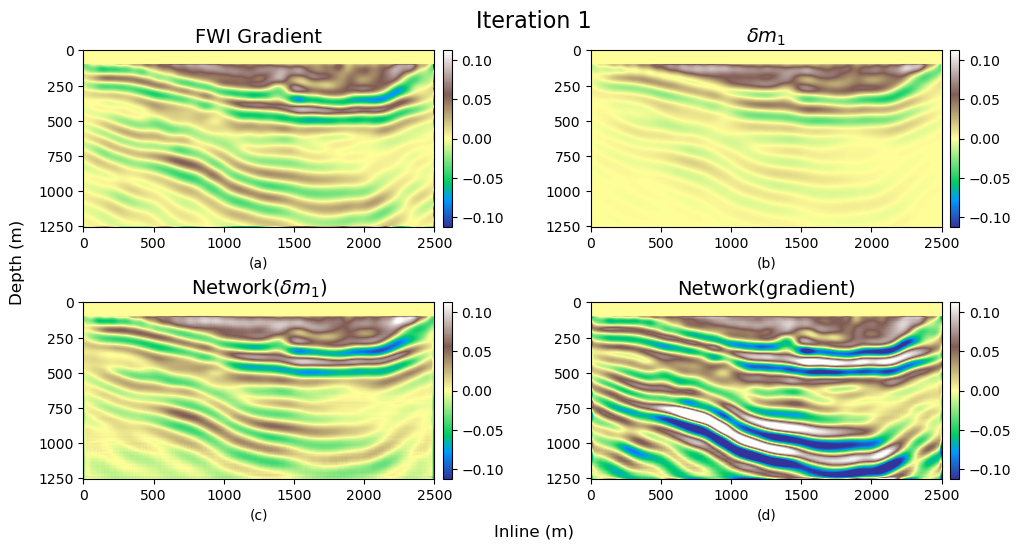

In [21]:
plot_results(expB2['gradients'], expB2['dm1s'], expB2['gradients_network'], expB2['dms'], 
             iteration=0, save_path=None)

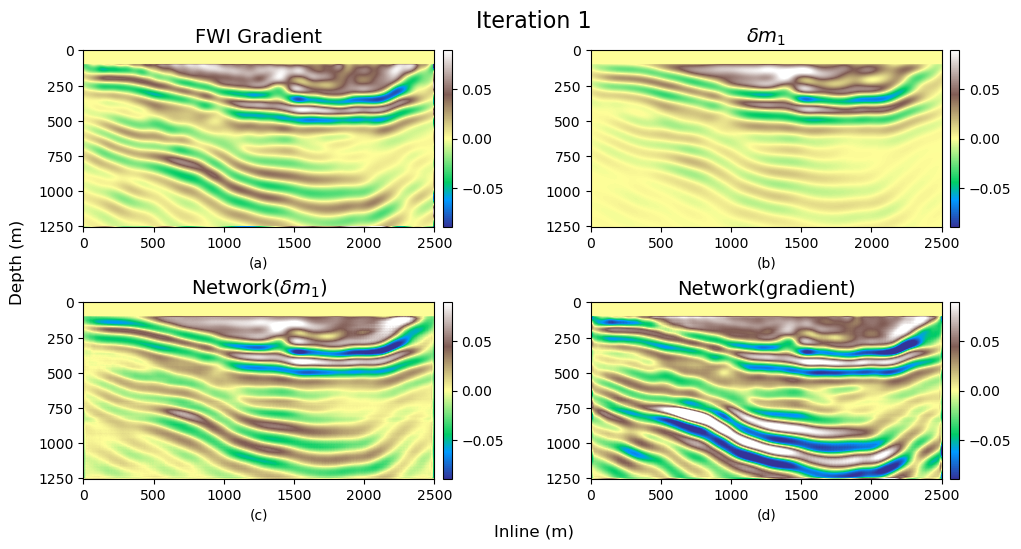

In [22]:
plot_results(expP2['gradients'], expP2['dm1s'], expP2['gradients_network'], expP2['dms'], 
             iteration=0, save_path=None)